<a href="https://colab.research.google.com/github/sgalrot/auto-tel/blob/main/AutoTel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

## Setup matplotlib to output figures into the notebook
%matplotlib inline

## Set some default values of the the matplotlib plots
plt.rcParams['figure.figsize'] = (6.0, 6.0)  # Set default plot's sizes
plt.rcParams['figure.dpi'] = 120  # Set default plot's dpi (increase fonts' size)
plt.rcParams['axes.grid'] = True  # Show grid by default in figures

### Loading the dataset

In [ ]:
dataset_location = 'https://opendata.tel-aviv.gov.il//AutoTelReservations/202107_AutoTel.csv'

## Loading the data
dataset = pd.read_csv(dataset_location, parse_dates=['startDate', 'endDate', 'tripActualStart', 'tripActualEnd'])
## Drop nans
dataset.dropna(inplace=True)

def quantile_field(field):
  # returns low, high 95% of data
  low = 0.025
  high = 0.975
  return dataset[field].quantile(low), dataset[field].quantile(high)

y_field = 'tripTimeAmount'
x_fields = ['tripActualStart', 'startLatitude', 'startLongitude', 'endLatitude', 'endLongitude', 'tripDistanceUsed', 'tripDistanceUsed']

dataset = dataset[(dataset['tripTimeAmount'] <= quantile_field('tripTimeAmount')[1]) & (dataset['tripTimeAmount'] > quantile_field('tripTimeAmount')[0])]
dataset = dataset[(dataset['startLatitude'] <= quantile_field('startLatitude')[1]) & (dataset['startLatitude'] > quantile_field('startLatitude')[0])]
dataset = dataset[(dataset['endLatitude'] <= quantile_field('endLatitude')[1]) & (dataset['endLatitude'] > quantile_field('endLatitude')[0])]
dataset = dataset[(dataset['startLongitude'] <= quantile_field('startLongitude')[1]) & (dataset['startLongitude'] > quantile_field('startLongitude')[0])]
dataset = dataset[(dataset['endLongitude'] <= quantile_field('endLongitude')[1]) & (dataset['endLongitude'] > quantile_field('endLongitude')[0])]
dataset = dataset[(dataset['tripDistanceUsed'] <= quantile_field('tripDistanceUsed')[1]) & (dataset['tripDistanceUsed'] > quantile_field('tripDistanceUsed')[0])]



In [ ]:
dataset

,reservationId,startDate,endDate,tripActualStart,tripActualEnd,tripTimeAmount,tripDistanceUsed,reservationDate,cancellationDate,carId,reservationStatus,pricePlanId,pricePlan,startLatitude,startLongitude,endLatitude,endLongitude
1,1978215,2021-07-01 00:05:00,2021-07-01 00:05:00,2021-07-01 00:05:00,2021-07-01 00:24:00,1140.0,10.0,07/01/2021 00:05:00,01/01/2001 00:00:00,314.0,Ended,7.0,מתמיד FREE,32.06166,34.80570,32.11881,34.82722
2,1978216,2021-07-01 00:06:00,2021-07-01 00:11:00,2021-07-01 00:11:00,2021-07-01 00:29:00,1062.0,9.0,07/01/2021 00:06:00,01/01/2001 00:00:00,345.0,Ended,5.0,מזדמן FREE,32.10728,34.83423,32.09031,34.77792
4,1978218,2021-07-01 00:08:00,2021-07-01 00:17:00,2021-07-01 00:17:00,2021-07-01 00:49:00,1929.0,2.0,07/01/2021 00:08:00,01/01/2001 00:00:00,202.0,Ended,0.0,מסלול אוטותל המקורי,32.06709,34.77243,32.06484,34.77072
6,1978220,2021-07-01 00:14:00,2021-07-01 00:24:00,2021-07-01 00:24:00,2021-07-01 00:49:00,1506.0,11.0,07/01/2021 00:14:00,01/01/2001 00:00:00,250.0,Ended,2.0,מסלול מתמיד דיגיטל,32.11105,34.81366,32.06985,34.76637
7,1978221,2021-07-01 00:17:00,2021-07-01 00:19:00,2021-07-01 00:19:00,2021-07-01 00:34:00,901.0,3.0,07/01/2021 00:17:00,01/01/2001 00:00:00,106.0,Ended,7.0,מתמיד FREE,32.07712,34.77497,32.07547,34.77989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47528,2037914,2021-07-31 23:53:00,2021-08-01 00:00:00,2021-08-01 00:00:00,2021-08-01 00:14:00,808.0,6.0,07/31/2021 23:53:00,01/01/2001 00:00:00,157.0,Ended,1.0,מסלול מתמיד אוטותל,32.06974,34.79133,32.10717,34.80241
47529,2037915,2021-07-31 23:54:00,2021-07-31 23:54:00,2021-07-31 23:54:00,2021-08-01 00:22:00,1672.0,9.0,07/31/2021 23:54:00,01/01/2001 00:00:00,334.0,Ended,0.0,מסלול אוטותל המקורי,32.07636,34.78559,32.10559,34.81889
47530,2037917,2021-07-31 23:55:00,2021-07-31 23:58:00,2021-07-31 23:58:00,2021-08-01 00:09:00,712.0,3.0,07/31/2021 23:55:00,01/01/2001 00:00:00,156.0,Ended,8.0,מתמיד דיגיתל FREE,32.06734,34.77518,32.05684,34.76092
47531,2037918,2021-07-31 23:58:00,2021-08-01 00:06:00,2021-08-01 00:06:00,2021-08-01 00:15:00,526.0,3.0,07/31/2021 23:58:00,01/01/2001 00:00:00,37.0,Ended,7.0,מתמיד FREE,32.10233,34.82291,32.10900,34.80355


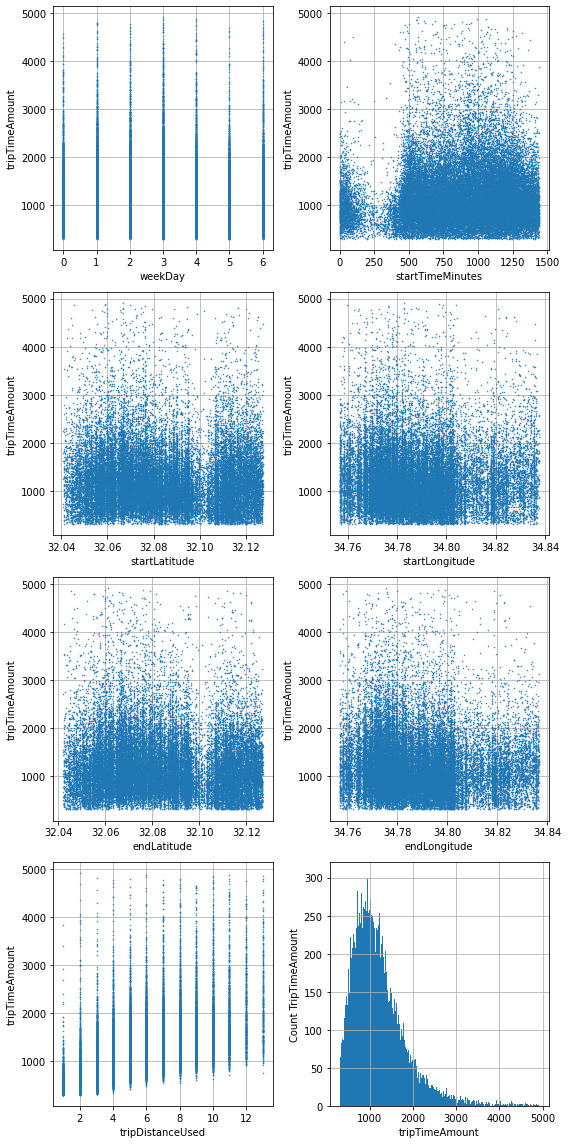

In [ ]:
ncols = 2
nrows = 4

fig, axes = plt.subplots(nrows, ncols, figsize=(4*ncols, 4*nrows))  # Create a figure with 3 over 3 axes
axes = axes.flatten()  # Convert the object storing the axes for a 3 by 3 array into a 1D array of lenth 9.
# Building processed functions extracted from the dataset
phi_x_fields = ['weekDay', 'startTimeMinutes', 'startLatitude', 'startLongitude', 'endLatitude', 'endLongitude', 'tripDistanceUsed']

def build_phi_x_field(dataset, x_field='weekDay'):
  if x_field == 'weekDay':
    return np.array([date.weekday() for date in dataset['tripActualStart']])
  elif x_field == 'startTimeMinutes':
    return np.array([date.hour*60 + date.minute for date in dataset['tripActualStart']])
  else:
    return dataset[x_field]


for i_field, field in enumerate(phi_x_fields):
    ax = axes[i_field]
    ax.plot(build_phi_x_field(dataset, field), dataset[y_field].values, '.', markersize=1)
    ax.set_xlabel(field)
    ax.set_ylabel(y_field)

ax = axes[-1]
dataset['tripTimeAmount'].hist(bins=500, ax=ax)
ax.set_xlabel('tripTimeAmount')
ax.set_ylabel('Count TripTimeAmount')
fig.tight_layout()   

## Train-test split

Before we start building our model we shall first divide the dataset into 80% train and 20% test.

**Note**: we will use the name train_full to indicate the train set before splitting it into train and validation.

In [ ]:
n_samples = len(dataset)  # The total number of samples in the dataset

## Generate a random generator with a fixed seed
rand_gen = np.random.RandomState(0)

## Generating a shuffled vector of indices
indices = np.arange(n_samples)
rand_gen.shuffle(indices)

## Split the indices into 80% train (full) / 20% test
n_samples_train_full = int(n_samples * 0.8)
train_full_indices = indices[:n_samples_train_full]
test_indices = indices[n_samples_train_full:]

## Extract the sub datasets from the full dataset using the calculated indices
train_full_set = dataset.iloc[train_full_indices]
test_set = dataset.iloc[test_indices]

## Train - validation split

Since we plan to test different configuration of building our model we would like to further split the train set into 75% train and 25% validation set. (which will result in a 60%-20%-20% over all split).

In [ ]:
## Generate a random generator with a fixed (different) seed
rand_gen = np.random.RandomState(1)

## Generating a shuffled vector of indices
indices = train_full_indices.copy()
rand_gen.shuffle(indices)

## Split the indices of the train (full) dataset into 75% train / 25% validation
n_samples_train = int(n_samples_train_full * 0.75)
train_indices = train_full_indices[:n_samples_train]
val_indices = train_full_indices[n_samples_train:]

## Extract the sub datasets from the full dataset using the calculated indices
train_set = dataset.iloc[train_indices]
val_set = dataset.iloc[val_indices]

### Evaluation
- **Reminder**: the RMSE score is given by $\sqrt{\tfrac{1}{N}\sum_i (\hat{y}_i-y_i)^2}$

In [ ]:
def calc_rmse(model, x, y):
    y_hat = model.predict(x)
    rmse = np.sqrt(1 / len(y) * (y - y_hat) @ (y - y_hat))
    return rmse

## Dummy Constant Model

In [ ]:
class DummyPredictConst:
    def __init__(self):
        self.theta = None 

    def fit(self, x, y):
        self.theta = np.mean(y)
    
    def predict(self, x):
        return self.theta

def extract_x_y(dataset):
    features = []
    for field in phi_x_fields:
        features.append(build_phi_x_field(dataset, field))
    x = np.stack(features, axis=1)
    y = dataset[y_field]
    return x, y

x_train, y_train = extract_x_y(train_set)
x_val, y_val = extract_x_y(val_set)

model = DummyPredictConst()
y_train = dataset[y_field]
model.fit(np.ones(y_train.shape), y_train)

print(f'The train score is: {calc_rmse(model, x_train, y_train):.2f}')
print(f'The validation score is: {calc_rmse(model, x_val, y_val):.2f}')

The train score is: 635.73
The validation score is: 634.58


## Third order features

We try a third order polynomial of the fields in the dataset.

In [ ]:
from sklearn.linear_model import LinearRegression

def extract_x_y(dataset):
    features = []
    ## Adding first order features
    for field in phi_x_fields:
        features.append(build_phi_x_field(dataset, field))
    ## Adding second order features
    for field1 in phi_x_fields:
       for field2 in phi_x_fields:
           features.append(build_phi_x_field(dataset, field1) * build_phi_x_field(dataset, field2))
    ## Adding third order features
    for field1 in phi_x_fields:
        for field2 in phi_x_fields:
            for field3 in phi_x_fields:
                features.append(build_phi_x_field(dataset, field1) * build_phi_x_field(dataset, field2) * build_phi_x_field(dataset, field3))

    x = np.stack(features, axis=1)
    y = dataset[y_field]
    return x, y

x_train, y_train = extract_x_y(train_set)
x_val, y_val = extract_x_y(val_set)

model = LinearRegression()
model.fit(x_train, y_train)

print(f'The train score is: {calc_rmse(model, x_train, y_train):.2f}')
print(f'The validation score is: {calc_rmse(model, x_val, y_val):.2f}')

The train score is: 439.01
The validation score is: 436.70


In [ ]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=0)
model.fit(x_train, y_train)

print(f'The train score is: {calc_rmse(model, x_train, y_train):.2f}')
print(f'The validation score is: {calc_rmse(model, x_val, y_val):.2f}')

The train score is: 458.83
The validation score is: 456.13


In [ ]:
## The list of lambdas to test
lambdas_list = [0.0001, 0.00001, 0.000001, 1e-8, 1e-12]

## We will use these two dictionaries to store the results for each lambda
train_scores = {}
val_scores = {}

for lambda_value in lambdas_list:
    model = Ridge(alpha=lambda_value)
    model.fit(x_train, y_train)
    
    train_scores[lambda_value] = calc_rmse(model, x_train, y_train)
    val_scores[lambda_value] = calc_rmse(model, x_val, y_val)

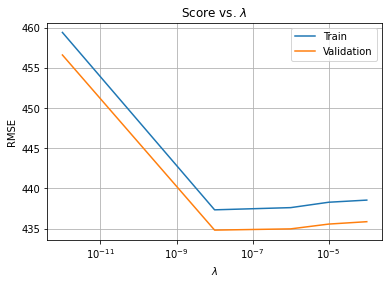

In [ ]:
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.plot(list(train_scores.keys()), list(train_scores.values()), label='Train')
ax.plot(list(val_scores.keys()), list(val_scores.values()), label='Validation')
ax.set_ylabel('RMSE')
ax.set_xlabel('$\lambda$')
ax.set_title('Score vs. $\lambda$')
ax.legend();

In [ ]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.01, max_iter=10000)
model.fit(x_train, y_train)
    
print(f'The train score is: {calc_rmse(model, x_train, y_train):.2f}')
print(f'The validation score is: {calc_rmse(model, x_val, y_val):.2f}')

The train score is: 468.27
The validation score is: 463.53


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.284e+09, tolerance: 8.461e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


## Conclusion:
Among 4 different models we found that the best predictor is based on Ridge model with Lambda = 1e-8 which improves the dummy constant mean value model by \~32% to 435 seconds rmse prediction (~7 minutes)

In [ ]:
model = Ridge(alpha=1e-8)
model.fit(x_train, y_train)
print(model.coef_)
print(f'The train score is: {calc_rmse(model, x_train, y_train):.2f}')
print(f'The validation score is: {calc_rmse(model, x_val, y_val):.2f}')

[ 1.60194907e+06 -3.27565355e+04 -2.45378834e+05 -3.20613040e+04
  2.11207439e+06  1.03122941e+06  6.02963455e+06 -1.48101278e+04
  6.76915483e+05 -1.72796034e+06  8.16189426e+05 -2.35241688e+05
 -2.86090324e+05  6.25950569e+05 -6.76896633e+05  3.74698990e-02
  6.40933907e+05 -1.18638471e+06 -8.23989449e+05 -9.71926742e+05
  3.72208038e+05  1.33503634e+06 -6.35560664e+05 -2.78599247e+06
 -6.80677847e+05  8.42669836e+04  2.13986894e+06 -2.42028064e+05
 -3.85390419e+05  1.18384402e+06  6.70078290e+05 -2.17934868e+05
  8.34776054e+05  6.72389229e+03 -1.01496305e+06  3.14159782e+05
  8.25521797e+05  1.75334157e+06  9.27467702e+04 -1.59102536e+06
 -1.73337105e+05  6.39984985e+05  5.54127402e+04  9.69982146e+05
  1.23579889e+06 -3.58114331e+05  4.99820623e+05 -1.58774221e+06
  5.92034923e+04 -6.31833102e+05 -3.72212683e+05  1.16000211e+06
 -3.61837077e+05 -1.45710488e+05 -3.26736218e+05 -1.16904530e+04
  1.12481755e+01 -7.70231242e+04  1.59891646e+05 -1.92882113e+05
 -3.92527894e+05  5.30336

## Prediction:
In order to predict, use the above model with the following inputs:
['weekDay', 'startTimeMinutes', 'startLatitude', 'startLongitude', 'endLatitude', 'endLongitude', 'tripDistanceUsed']